#### **FMCG Sales Demand Forecasting and Optimization**

**Project Overview**

**Objective :** \
Analyze retail store performance in California across various dimensions like sales, category, location, marketing and promotion

**Dataset Source :** \
*kaggle.com/datasets/krishanukalita/fmcg-sales-demand-forecasting-and-optimization*

**Goal :** \
Provide actionable insights into potential relationship between sales and other variables. \
Identifying factors influencing sales by each store category, store location, promotion counts and marketing spend 

##### Import Libraries

In [1]:
# Essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization style libraries
# plt.style.use('dark_background')
plt.style.use('default')
import matplotlib
custom = {
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'figure.figsize': (10,8),
    'axes.labelsize': 14,
    'axes.titlesize': 16,
    'axes.facecolor': '#aaaaaa',
    'figure.facecolor': '#bbbbbb',
    'grid.color': '#000000',
    'grid.linewidth': 0.2,
    'legend.edgecolor': '#000000',
}
matplotlib.rcParams.update(custom)
import plotly.express as px

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Kagglehub library
import kagglehub

##### Data Collection

Loading Dataset

The dataset is stored in a downloadable csv file. \
It contains details such as Sales, Product, Store, Promotion, Price, Cost and Stock

In [3]:
# Download csv files from kaggle and stored in local machine

path = 'krishanukalita/fmcg-sales-demand-forecasting-and-optimization'
url = kagglehub.dataset_download(path)
urlpath = '\extended_fmcg_demand_forecasting.csv'
file = f'{url}{urlpath}'
df = pd.read_csv(fr'{file}', low_memory=False, encoding='utf-8')

##### Data Preprocessing

- Remove null or duplicate values
- Convert data types
- Assign/Create new column based on suitable preference

In [82]:
"""
Data Inspection
"""
# Summary
print(f'Summary Statistics: \n{df.describe()}\n')

# Dataset Shape
print(f'Total Rows: {df.shape[0]} \nTotal Columns: {df.shape[1]}\n')

# Missing Value
print(f'Missing Data per Column: \n{df.isnull().sum()}\n')

# Duplicate Value
print(f'Duplicate Data per Column: \n{df.duplicated().sum()}\n')

# Head
print(f'Head: \n{df.head()}\n')

# Info
print(f'Info: \n{df.info()}\n')

Summary Statistics: 
                      Date  Sales_Volume        Price    Promotion  \
count                 1000   1000.000000  1000.000000  1000.000000   
mean   2023-05-15 12:00:00   1048.781000    10.362460     0.491000   
min    2022-01-01 00:00:00    101.000000     1.000000     0.000000   
25%    2022-09-07 18:00:00    591.750000     5.540000     0.000000   
50%    2023-05-15 12:00:00   1064.500000    10.405000     0.000000   
75%    2024-01-20 06:00:00   1489.000000    15.050000     1.000000   
max    2024-09-26 00:00:00   1997.000000    19.940000     1.000000   
std                    NaN    539.688298     5.420563     0.500169   

       Supplier_Cost  Replenishment_Lead_Time  Stock_Level   Gross_Sales  \
count    1000.000000              1000.000000  1000.000000   1000.000000   
mean        7.552070                 4.970000   266.494000  10839.833630   
min         0.500000                 1.000000    50.000000    203.010000   
25%         3.887500                 3.00000

In [4]:
"""
Convert Data Types
"""
#Convert relevant data type
df['Date'] = pd.to_datetime(df['Date'])
df['Price'] = df['Price'].astype('float64').round(2)
df['Supplier_Cost'] = df['Supplier_Cost'].astype('float64').round(2)

In [5]:
"""
Assign/Create new column
"""
# Assign month and year column for 'Date'
df['Weekday'] = df['Date'].dt.day_name()
df['Month'] = df['Date'].dt.strftime('%Y-%m')

# Assign new column to sum sales and profit
df['Gross_Sales'] = df['Sales_Volume']*df['Price'].astype('float64')
df['Gross_Profit'] = (df['Sales_Volume']*df['Price'])-df['Supplier_Cost']

In [13]:
df['Date'] = pd.to_datetime(df['Date']).dt.strftime('%Y-%m-%d')
df['Promotion'] = df['Promotion'].astype(str)

In [19]:
promo_map = {'0' : 'No', '1' : 'Yes'}
df['Promotion'] = df['Promotion'].map(promo_map)

In [22]:
df.to_excel(r'D:\Folders-VS Code\VS Code Folders\11-Portfolio Project\01-project_csvfiles\x-08-fmcg_sales.xlsx',index=False)

##### Exploratory Data Analysis

Correlation Analysis : \
Identify columns relationship 

In [85]:
df_copy = df.copy()
df_copy = df_copy.apply(lambda col: col.astype('category').cat.codes if col.dtypes=='object' else col)

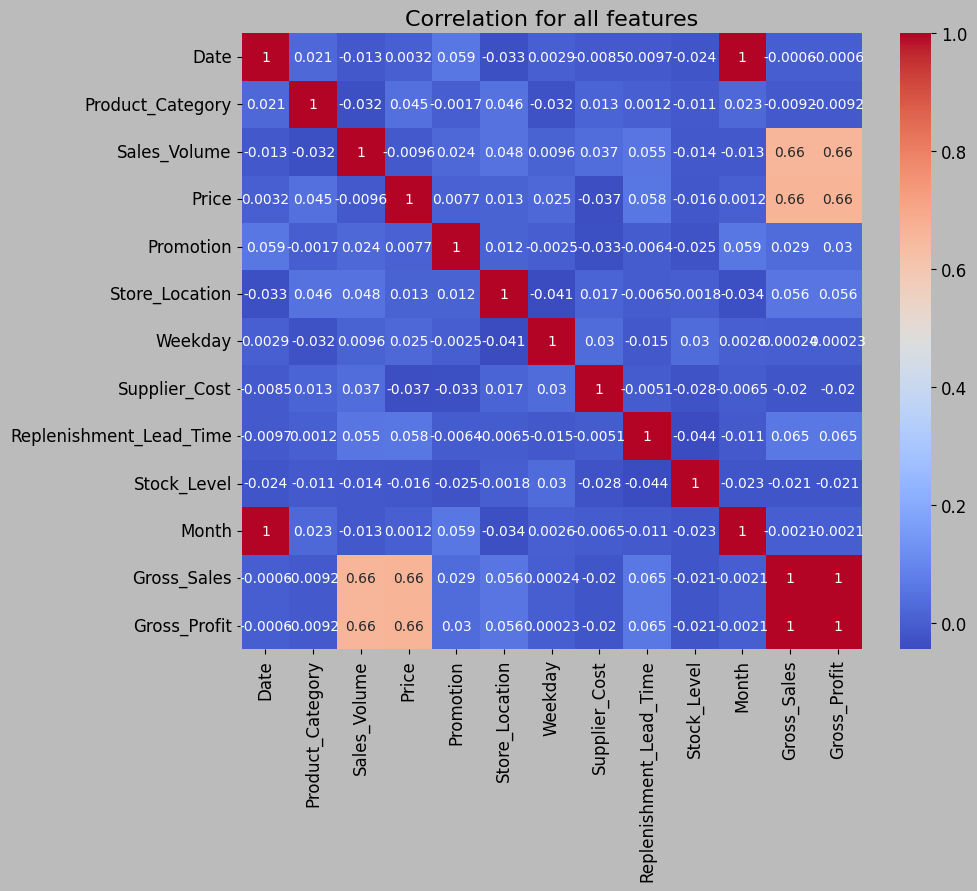

In [86]:
sns.heatmap(df_copy.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation for all features')

plt.show()

Sales and Profit Trend Analysis : \
Identify what key factor influence to gross sales and gross profit

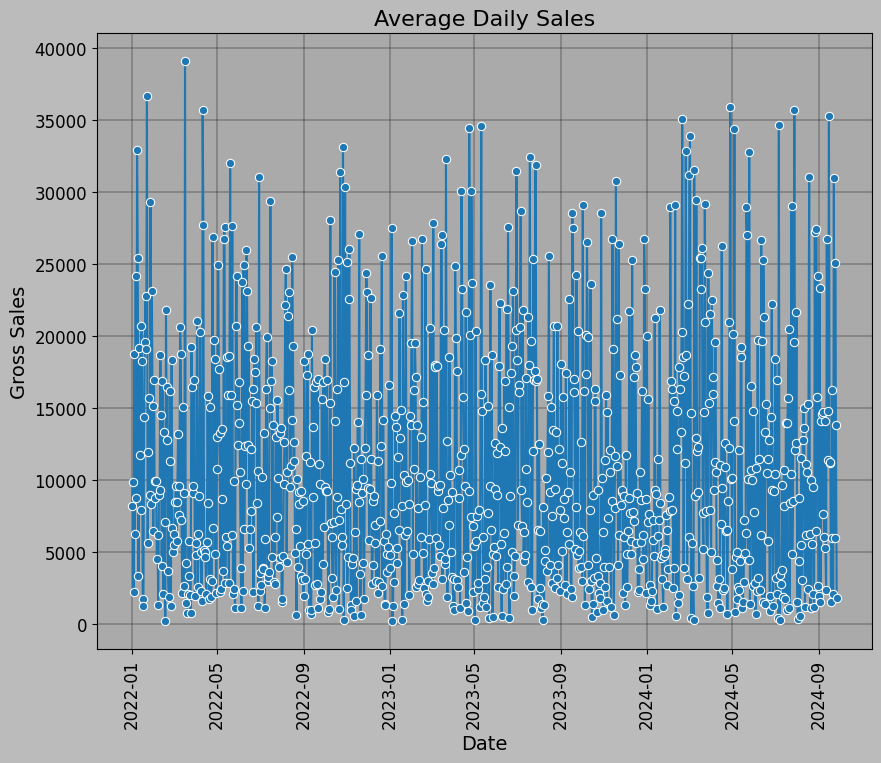

In [95]:
# Average Sales Distribution by Daily

sns.lineplot(data=df, x='Date', y='Gross_Sales',
             marker='o')
plt.title('Average Daily Sales')
plt.xlabel('Date')
plt.ylabel('Gross Sales')
plt.xticks(rotation=90)
plt.grid()
plt.show()

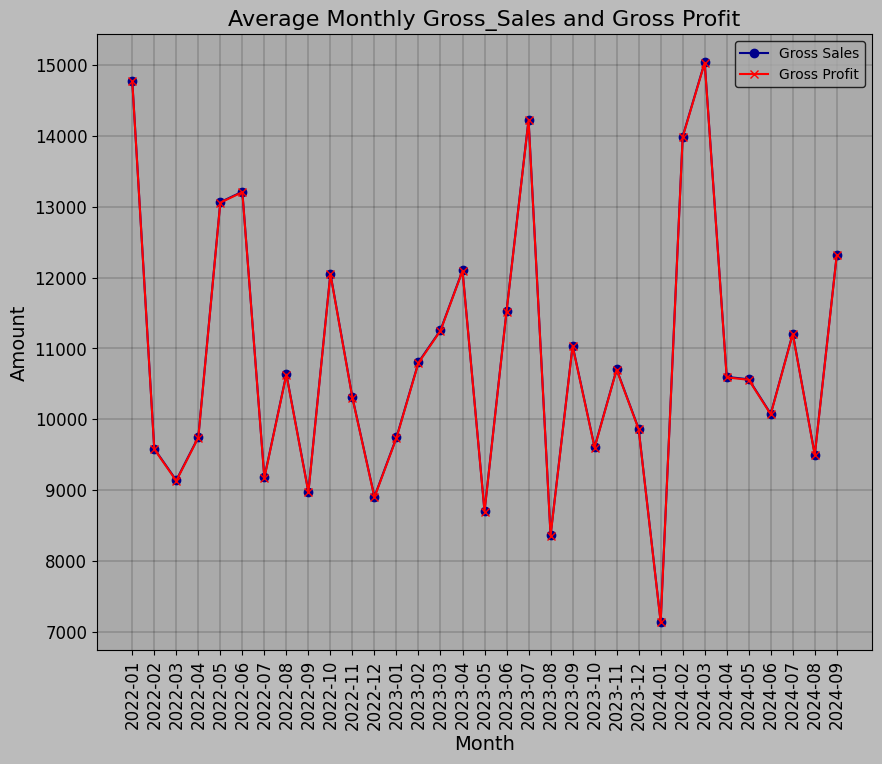

In [145]:
# Average Gross Sales and Gross Profit Distribution by Monthly

avg_sales_profit = df.groupby('Month')[['Gross_Sales','Gross_Profit']]\
              .mean().reset_index()
plt.plot(avg_sales_profit['Month'], avg_sales_profit['Gross_Sales'],
         marker='o', color='darkblue', label='Gross Sales')
plt.plot(avg_sales_profit['Month'], avg_sales_profit['Gross_Profit'],
         marker='x', color='red', label='Gross Profit')
plt.title('Average Monthly Gross_Sales and Gross Profit')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.xticks(rotation=90)
plt.grid()
plt.legend()
plt.show()

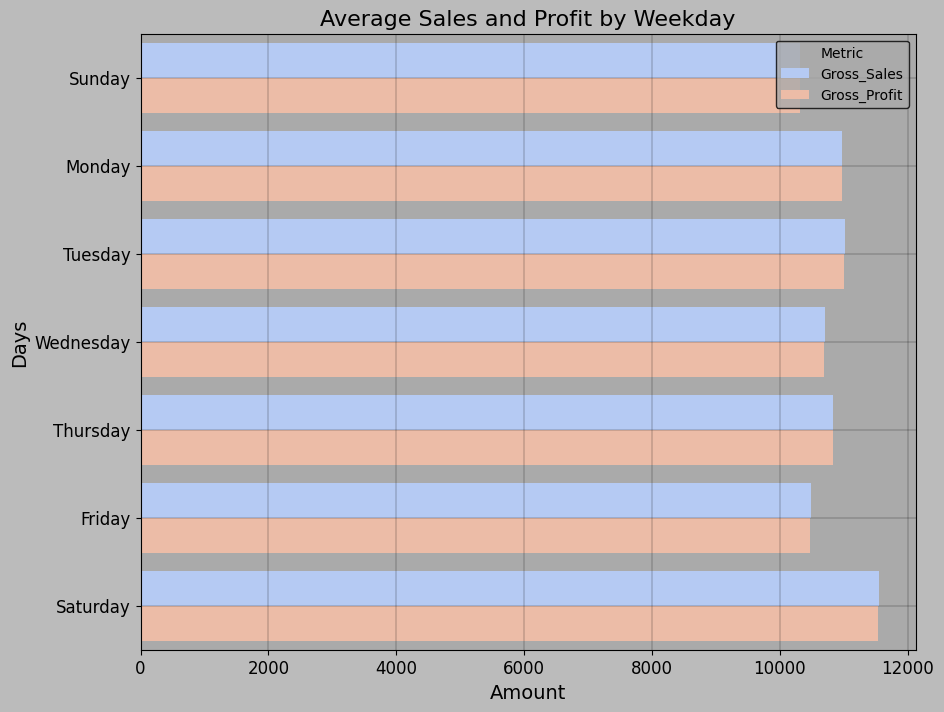

In [141]:
# Average Gross Sales and Gross Profit Distribution by Weekday

day = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
avg_sales_profit = df.groupby('Weekday')[['Gross_Sales', 'Gross_Profit']]\
              .mean().reset_index()
avg_sales_profit_week = \
  avg_sales_profit.melt(id_vars='Weekday',
                      value_vars=['Gross_Sales', 'Gross_Profit'],
                      var_name='Metric', value_name='Average')

sns.barplot(data=avg_sales_profit_week,
             x='Average', y='Weekday',
             hue='Metric', palette='coolwarm',
             order=day)
plt.title('Average Sales and Profit by Weekday')
plt.xlabel('Amount')
plt.ylabel('Days')
plt.grid()
plt.show()

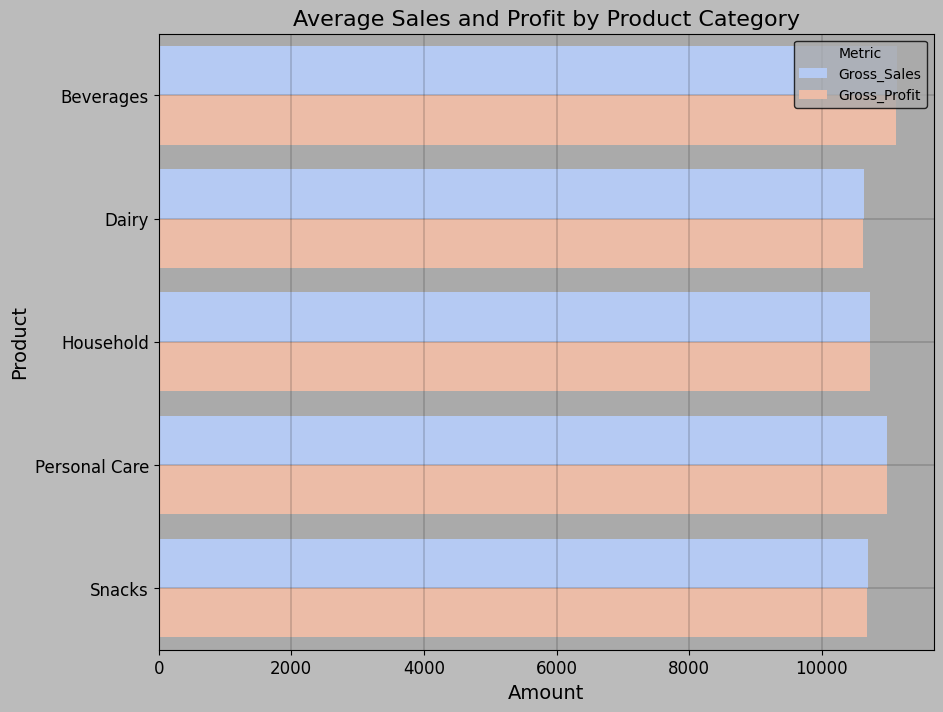

In [139]:
# Average Sales and Profit Distribution by Product Category

avg_sales_profit = df.groupby('Product_Category')[['Gross_Sales', 'Gross_Profit']]\
              .mean().reset_index()
avg_sales_profit_product = \
  avg_sales_profit.melt(id_vars='Product_Category',
                      value_vars=['Gross_Sales', 'Gross_Profit'],
                      var_name='Metric', value_name='Average')
sns.barplot(data=avg_sales_profit_product,
             x='Average', y='Product_Category',
             hue='Metric', palette='coolwarm')
plt.title('Average Sales and Profit by Product Category')
plt.xlabel('Amount')
plt.ylabel('Product')
plt.grid()
plt.show()

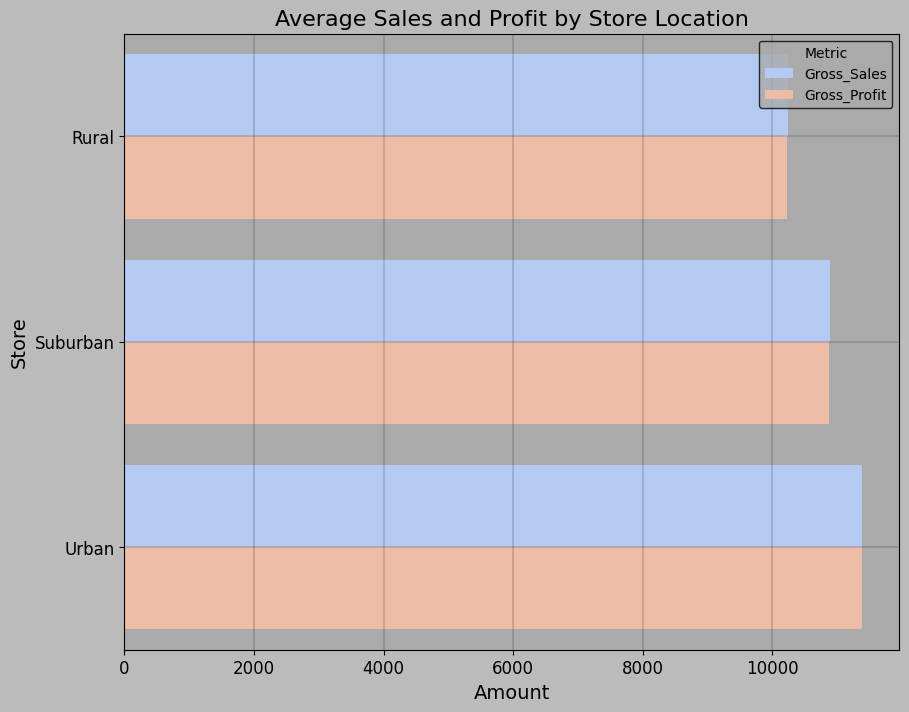

In [140]:
# Average Sales and Profit Distribution by Store Location

avg_sales_profit = df.groupby('Store_Location')[['Gross_Sales', 'Gross_Profit']]\
              .mean().reset_index()
avg_sales_profit_store = \
  avg_sales_profit.melt(id_vars='Store_Location',
                      value_vars=['Gross_Sales', 'Gross_Profit'],
                      var_name='Metric', value_name='Average')
sns.barplot(data=avg_sales_profit_store,
             x='Average', y='Store_Location',
             hue='Metric', palette='coolwarm')
plt.title('Average Sales and Profit by Store Location')
plt.xlabel('Amount')
plt.ylabel('Store')
plt.grid()
plt.show()
plt.show()

Price and Cost Analysis :\
Identify difference between price and cost 

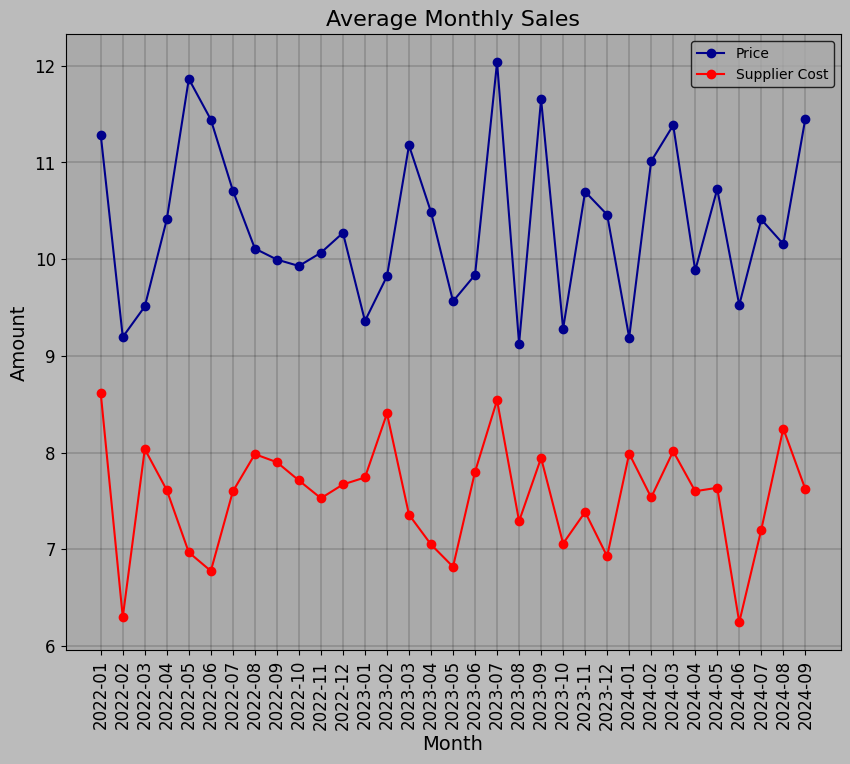

In [113]:
# Average Price and Supplier Cost Distribution by Monthly

avg_price_cost = df.groupby('Month')[['Price', 'Supplier_Cost']]\
              .mean().reset_index()

plt.plot(avg_price_cost['Month'], avg_price_cost['Price'],
         marker='o', color='darkblue', label='Price')
plt.plot(avg_price_cost['Month'], avg_price_cost['Supplier_Cost'],
         marker='o', color='red', label='Supplier Cost')
plt.title('Average Monthly Price and Cost')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.xticks(rotation=90)
plt.grid()
plt.legend()
plt.show()

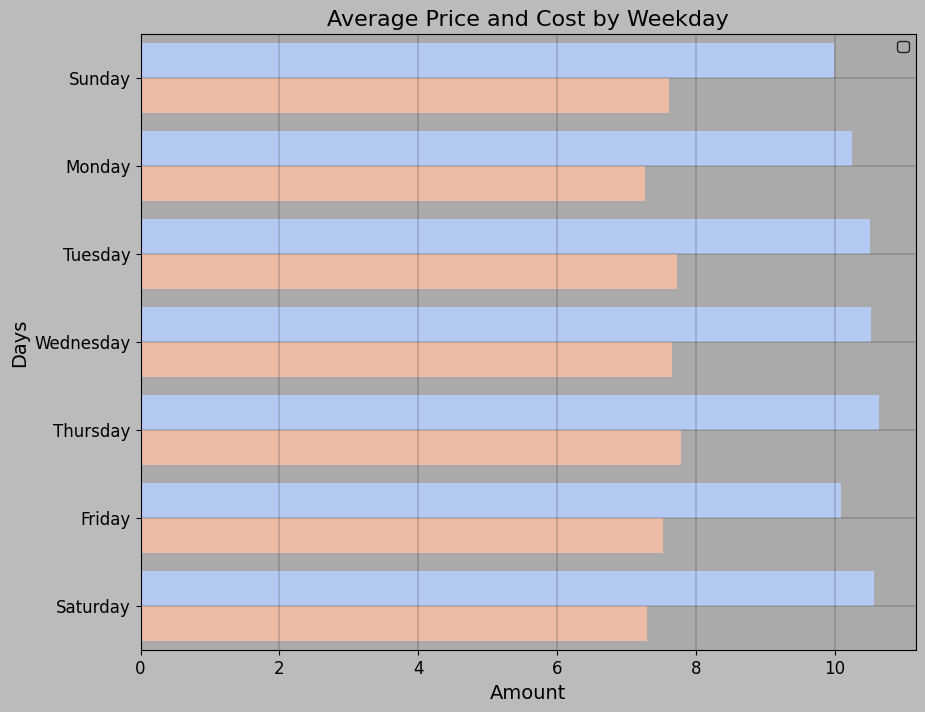

In [151]:
# Average Price and Supplier Cost Distribution by Weekday

day = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
avg_price_cost = df.groupby('Weekday')[['Price', 'Supplier_Cost']]\
              .mean().reset_index()
avg_price_cost_week = \
  avg_price_cost.melt(id_vars='Weekday',
                      value_vars=['Price', 'Supplier_Cost'],
                      var_name='Metric', value_name='Average')

sns.barplot(data=avg_price_cost_week,
             x='Average', y='Weekday',
             hue='Metric', palette='coolwarm',
             order=day)
plt.title('Average Price and Cost by Weekday')
plt.xlabel('Amount')
plt.ylabel('Days')
plt.grid()
plt.legend('')
plt.show()

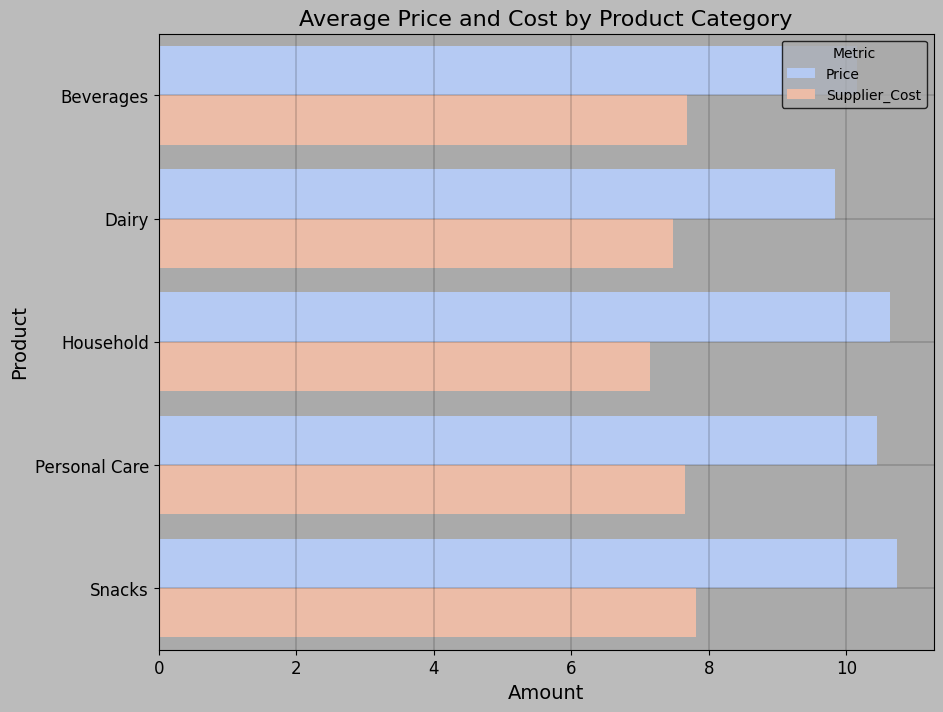

In [132]:
# Average Price and Supplier Cost Distribution by Product category

avg_price_cost = df.groupby('Product_Category')[['Price', 'Supplier_Cost']]\
              .mean().reset_index()
avg_price_cost_product = \
  avg_price_cost.melt(id_vars='Product_Category',value_vars=['Price', 'Supplier_Cost'],
                      var_name='Metric', value_name='Average')

sns.barplot(data=avg_price_cost_product,
             x='Average', y='Product_Category',
             hue='Metric', palette='coolwarm')
plt.title('Average Price and Cost by Product Category')
plt.xlabel('Amount')
plt.ylabel('Product')
plt.grid()
plt.show()

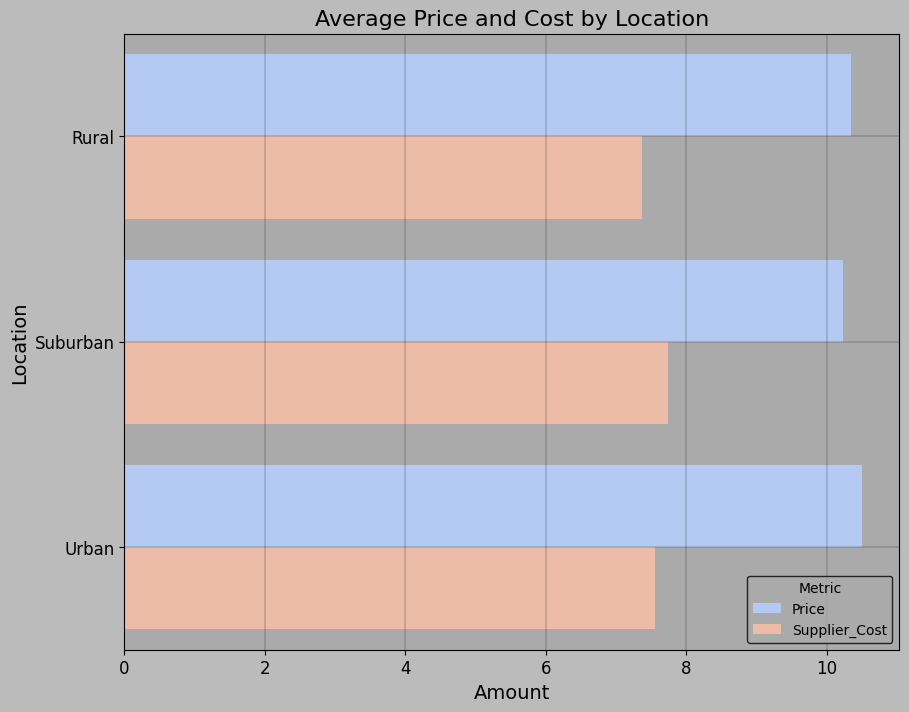

In [133]:
# Average Price and Supplier Cost Distribution by Store Location

avg_price_cost = df.groupby('Store_Location')[['Price', 'Supplier_Cost']]\
              .mean().reset_index()
avg_price_cost_store = \
  avg_price_cost.melt(id_vars='Store_Location',value_vars=['Price', 'Supplier_Cost'],
                      var_name='Metric', value_name='Average')

sns.barplot(data=avg_price_cost_store,
             x='Average', y='Store_Location',
             hue='Metric', palette='coolwarm')
plt.title('Average Price and Cost by Location')
plt.xlabel('Amount')
plt.ylabel('Location')
plt.grid()
plt.show()

Promotion Analysis :\
Identify whether promotion influence to profit

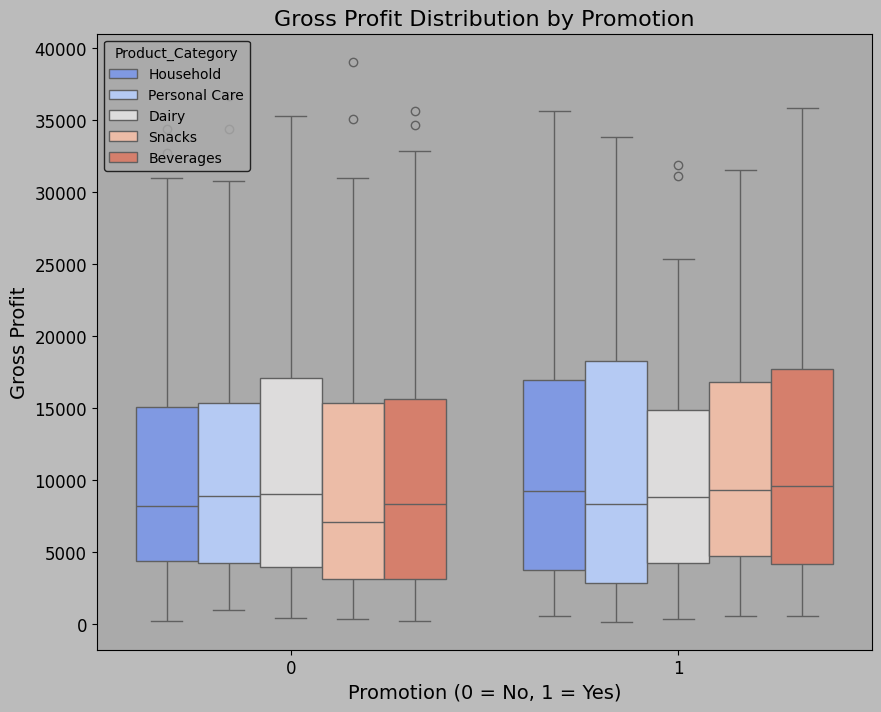

In [17]:
# Gross Profit Distribution by Promotion across Product Category

sns.boxplot(x='Promotion', y='Gross_Profit',
            data=df, hue='Product_Category', palette='coolwarm')
plt.title('Gross Profit Distribution by Product Promotion')
plt.xlabel('Promotion (0 = No, 1 = Yes)')
plt.ylabel('Gross Profit')
plt.show()

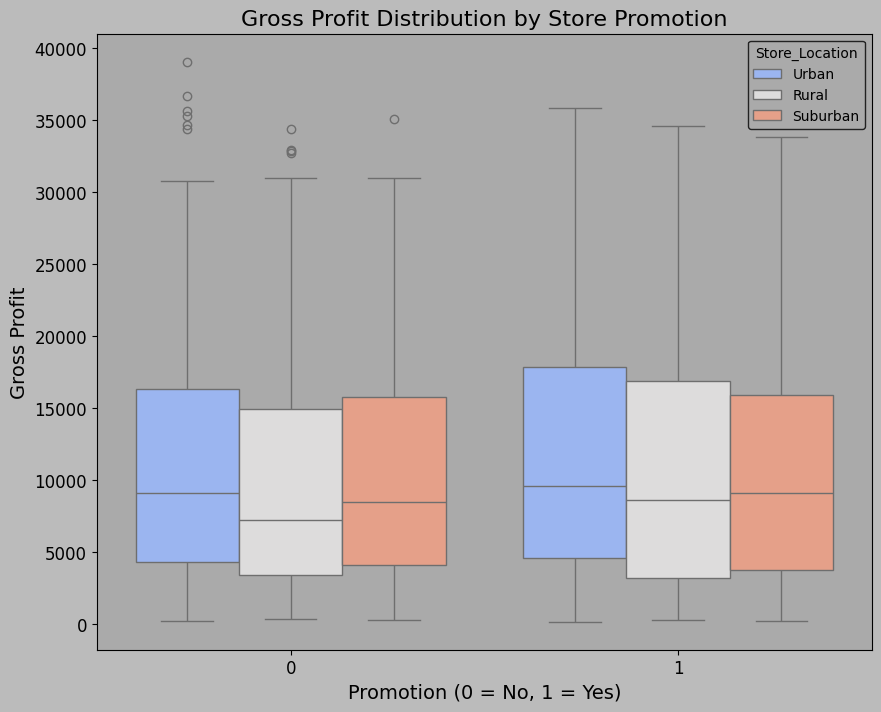

In [18]:
# Gross Profit Distribution by Promotion across Store Location

sns.boxplot(x='Promotion', y='Gross_Profit',
            data=df, hue='Store_Location', palette='coolwarm')
plt.title('Gross Profit Distribution by Store Promotion')
plt.xlabel('Promotion (0 = No, 1 = Yes)')
plt.ylabel('Gross Profit')
plt.show()

##### Advanced Analysis

In [33]:
# Import library
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Predictive Model : \
ARIMA

In [76]:
# Prepare data
arima_indexdate = df.set_index('Date')
arima_indexdate = arima_indexdate['Gross_Sales'].resample('M').mean()

# Define features and target
train_size = int(len(arima_indexdate) * 0.8)

# Split to train-test
train, test = arima_indexdate[:train_size], arima_indexdate[train_size:]
arima_model = ARIMA(train, order=(2, 0, 5)).fit()
# resample year/mean : order=511, year/sum : order=204
# resample day/sum : order=513
# resample month/mean : order=513, month/sum : order=314

# Model Forecast and Evaluation
forecast = arima_model.forecast(steps=len(test))

mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))
r2 = r2_score(test, forecast)
print(f'MAE: {mae} \nRMSE: {rmse} \nR2: {r2}')

MAE: 1076.7666359188402 
RMSE: 1221.642985904743 
R2: 0.49728204579699664


d:\Python\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


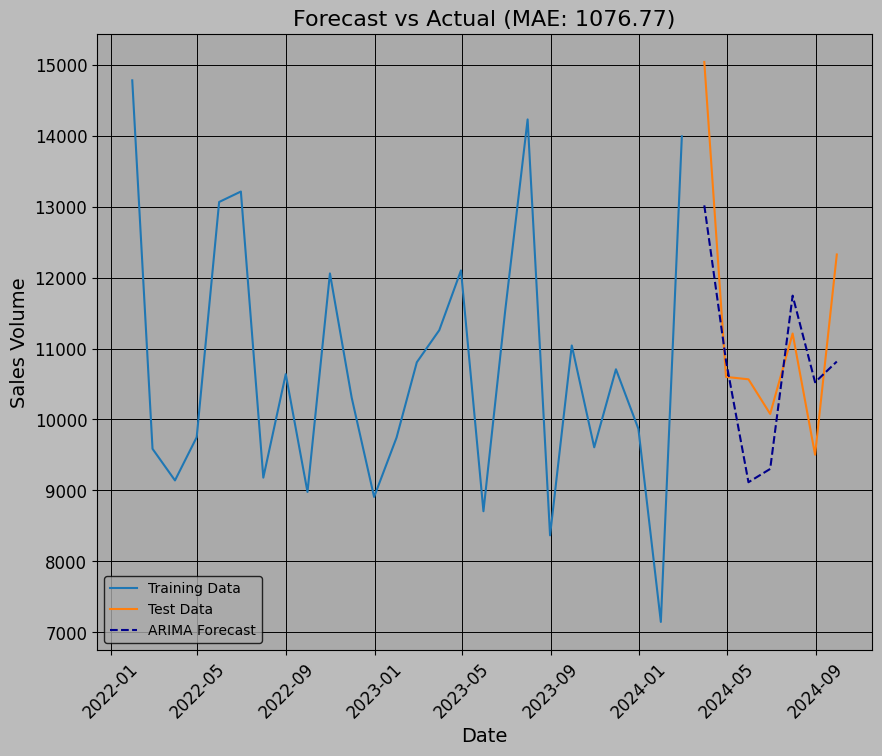

In [77]:
# PLotting forecast
plt.plot(train, label='Training Data')
plt.plot(test, label='Test Data')
plt.plot(test.index, forecast, color='darkblue',
         linestyle='--', label='ARIMA Forecast')
plt.title(f'Forecast vs Actual (MAE: {mae:.2f})')
plt.xlabel('Date')
plt.ylabel('Sales Volume')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

##### Summary/Conclusion

**Month** \
By gross sales and gross profit :
- have nearly same amount, inindicating sales and profit have slight difference

By price and supplier cost :
- Price well allign with supplier cost with certain margin amount

\
**Weekday** \
By gross sales and gross profit :
- *Saturday* is where people spend time shopping

By price and supplier cost :
- *Saturday* and *Monday* has low supplier cost and high sale price

\
**Product Category** \
By gross sales and gross profit :
- *Beverages* and *Personal Care* are in demand products

By price and supplier cost :
- *Household* product have the best margin amount

By promotion :
- All products seems influence to boost profit by promotion except for *Dairy* products

\
**Store Location** \
By gross sales and gross profit :
- *Urban* location are most profitable location

By price and supplier cost :
- All store allign well its price against supplier cost except *Suburban* with slight high cost and low price among others

By promotion :
- All stores influence to boost profit by promotion
except for *Suburban*